In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv("/Users/somsobe/Desktop/Walmart_Sales_Forecast/dataset/train.csv", 
                       names= ['Store','Dept','Date','Weekly_Sales','IsHoliday'],
                       sep =',', header = 0)
print(df_train)

df_features = pd.read_csv("/Users/somsobe/Desktop/Walmart_Sales_Forecast/dataset/features.csv",
                          sep =',',header = 0, 
                          names = ['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPT','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])
print(df_features)

# df_test = pd.read_csv("/Users/somsobe/Desktop/Walmart_Sales_Forecast/dataset/test.csv",header = 0)
# print(df_test)

df_stores = pd.read_csv("/Users/somsobe/Desktop/Walmart_Sales_Forecast/dataset/stores.csv",names = ['Store','Type','Size'], sep = ',',header = 0)
print(df_stores)



        Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]
      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        

In [4]:
# Cộng các weeky_sales của dept theo cùng store và ngày

train_weeklysales = df_train.groupby(["Store", "Date"])

# df_train["train_weeklysales"]

print(train_weeklysales)


In [1]:
dataset = df_train.merge(df_stores, how='left').merge(df_features,how='left')
print(dataset)

NameError: name 'df_train' is not defined

In [30]:
gr1_dataset = dataset.groupby(["Date","Store"]).sum()
print(gr1_dataset)


                  Dept  Weekly_Sales  IsHoliday  \
Date       Store                                  
2010-02-05 1      3184    1643690.90          0   
           2      3251    2136989.46          0   
           3      2640     461622.22          0   
           4      3233    2135143.87          0   
           5      2458     317173.10          0   
...                ...           ...        ...   
2012-10-26 41     3244    1316542.59          0   
           42     2411     514756.08          0   
           43     2242     587603.55          0   
           44     2465     361067.07          0   
           45     2907     760281.43          0   

                                                               Type      Size  \
Date       Store                                                                
2010-02-05 1      AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...  11045995   
           2      AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...  14768411   
           3

In [33]:
gr2_dataset = gr1_dataset.loc[:,["Date", "Store","Dept","Weekly_Sales"]]


df2_dataset = pd.DataFrame(gr2_dataset)
df2_dataset.set_index(['Date', 'Store'], inplace=True)
print(df2_dataset)
# gr2_dataset.plot(x="Date", y="Weekly_Sales", kind="line", linestyle = "dashed", color = 'r')

IndexError: .iloc requires numeric indexers, got ['Date' 'Store' 'Dept' 'Weekly_Sales']

In [9]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

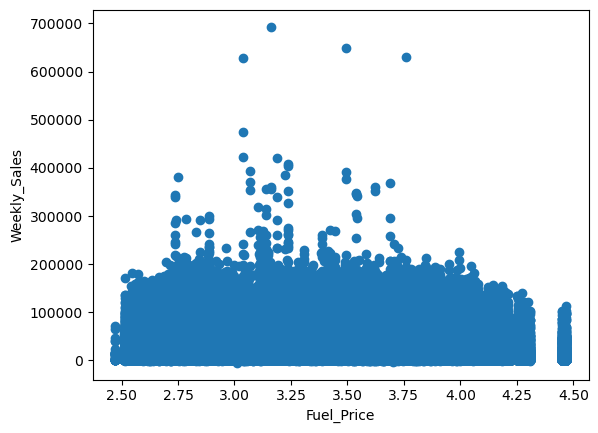

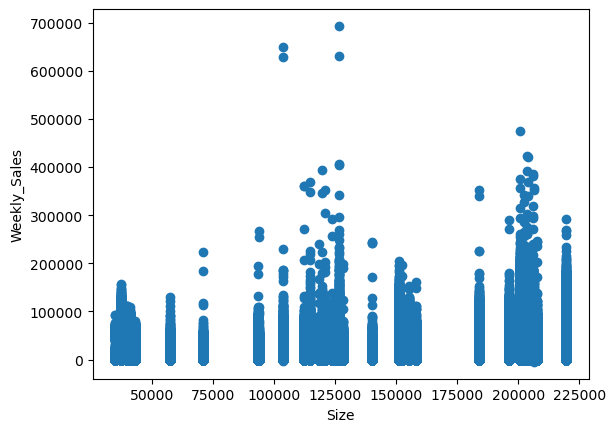

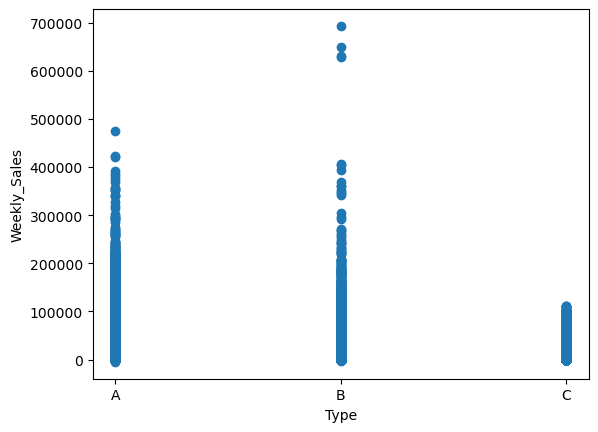

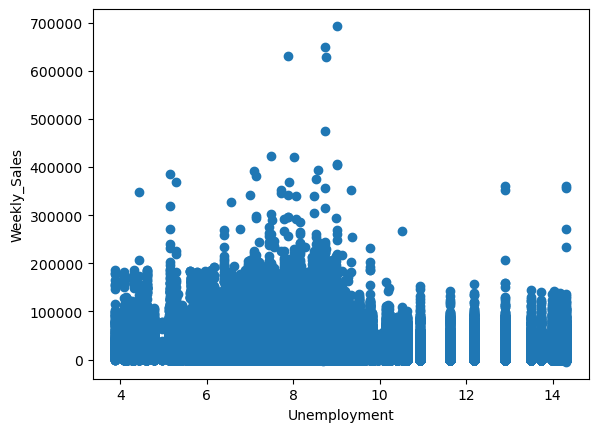

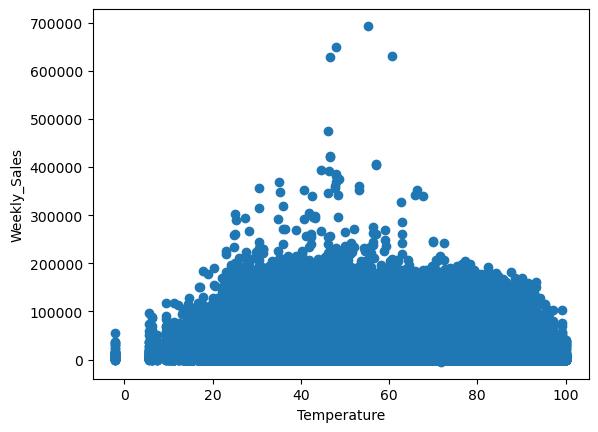

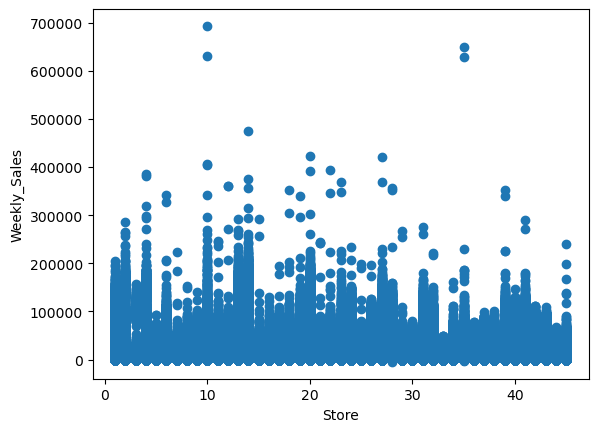

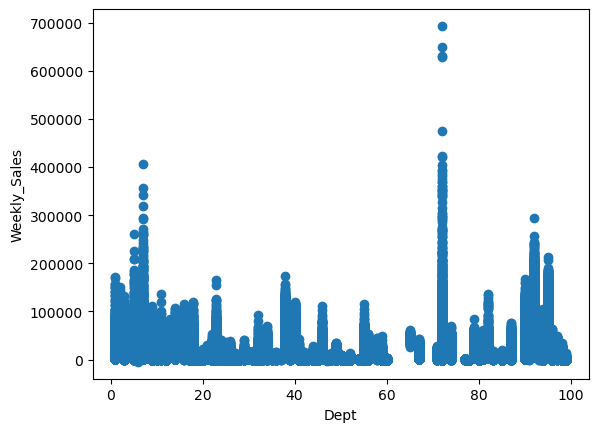

In [12]:
scatter(dataset, 'Fuel_Price')
scatter(dataset, 'Size')
scatter(dataset, 'Type')
scatter(dataset, 'Unemployment')
scatter(dataset, 'Temperature')
scatter(dataset, 'Store')
scatter(dataset, 'Dept')

In [ ]:
def bar(dataset, column):
    plt.figure()
    plt.bar(dataset[column] , dataset['Weekly_Sales'], kind ="bar")
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

AttributeError: Line2D.set() got an unexpected keyword argument 'kind'

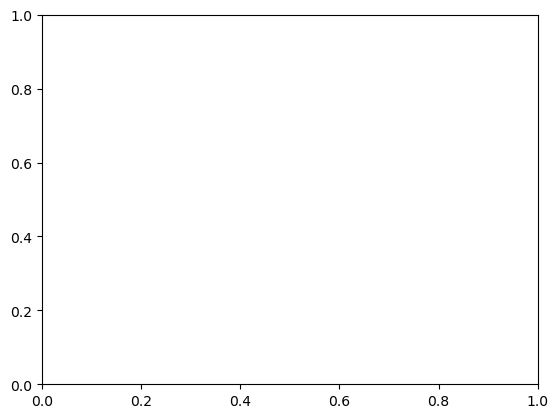

In [14]:
bar(dataset, 'Fuel_Price')
bar(dataset, 'Size')
bar(dataset, 'Type')
bar(dataset, 'Unemployment')
bar(dataset, 'Temperature')
bar(dataset, 'Store')
bar(dataset, 'Dept')

In [19]:
gr1_dataset = dataset.groupby(["Store","Date"]).sum()
print(gr1_dataset)


                  Dept  Weekly_Sales  IsHoliday  \
Store Date                                        
1     2010-02-05  3184    1643690.90          0   
      2010-02-12  3137    1641957.44         72   
      2010-02-19  3184    1611968.17          0   
      2010-02-26  3137    1409727.59          0   
      2010-03-05  3215    1554806.68          0   
...                ...           ...        ...   
45    2012-09-28  2853     713173.95          0   
      2012-10-05  2952     733455.07          0   
      2012-10-12  2853     734464.36          0   
      2012-10-19  2853     718125.53          0   
      2012-10-26  2907     760281.43          0   

                                                               Type      Size  \
Store Date                                                                      
1     2010-02-05  AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...  11045995   
      2010-02-12  AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...  10894680   
      2010-0

In [31]:
def line(dataset, column):
    plt.figure()
    plt.plot(dataset[column],dataset['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)
    plt.show()

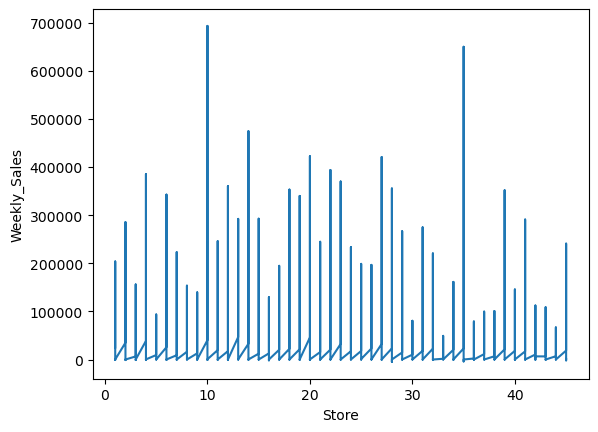

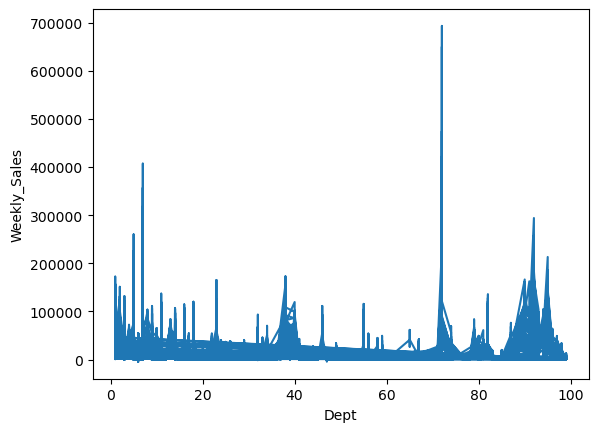

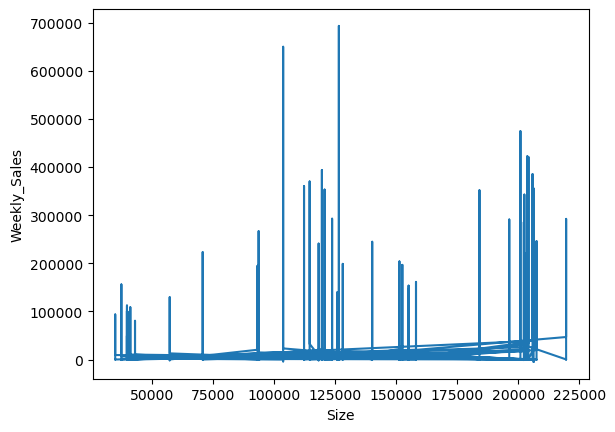

In [33]:
line(dataset[Dept]='1','Store')
line(dataset,'Dept')
line(dataset,'Size')